In [8]:
using Symbolics
using GamesVoI
using Plots
using DataFrames
# include("experiments/tower_defense_exponential.jl")
include("experiments/tower_defense.jl")

compute_stage_2

In [9]:
prior = [1/3, 1/3,1/3]
omega_params = [[2, 1, 1], [1, 2, 1], [1, 1, 2]]
r_init =[0.5,0.25,0.25]

out = solve_r(prior,omega_params,r_init=r_init, return_states=true)

0: r = [0.5, 0.25, 0.25]


r = [0.556, 0.222, 0.222]
r = [0.63, 0.185, 0.185]


r = [0.728, 0.136, 0.136]
r = [0.86, 0.07, 0.07]


r = [1.0, 0.0, 0.0]
r = [1.0, 0.0, 0.0]


r = [1.0, 0.0, 0.0]


r = [1.0, 0.0, 0.0]
r = [1.0, 0.0, 0.0]


r = [1.0, 0.0, 0.0]
r = [1.0, 0.0, 0.0]


r = [1.0, 0.0, 0.0]
r = [1.0, 0.0, 0.0]


r = [1.0, 0.0, 0.0]
r = [1.0, 0.0, 0.0]


r = [1.0, 0.0, 0.0]
r = [1.0, 0.0, 0.0]
r = [1.0, 0.0, 0.0]


r = [1.0, 0.0, 0.0]
r = [1.0, 0.0, 0.0]


r = [1.0, 0.0, 0.0]
r = [1.0, 0.0, 0.0]
r = [1.0, 0.0, 0.0]


r = [1.0, 0.0, 0.0]
r = [1.0, 0.0, 0.0]


r = [1.0, 0.0, 0.0]
r = [1.0, 0.0, 0.0]


r = [1.0, 0.0, 0.0]
r = [1.0, 0.0, 0.0]


r = [1.0, 0.0, 0.0]
r = [1.0, 0.0, 0.0]


r = [1.0, 0.0, 0.0]
r = [1.0, 0.0, 0.0]


r = [1.0, 0.0, 0.0]
r = [1.0, 0.0, 0.0]


r = [1.0, 0.0, 0.0]
r = [1.0, 0.0, 0.0]


r = [1.0, 0.0, 0.0]
r = [1.0, 0.0, 0.0]


r = [1.0, 0.0, 0.0]
r = [1.0, 0.0, 0.0]


r = [1.0, 0.0, 0.0]
r = [1.0, 0.0, 0.0]


r = [1.0, 0.0, 0.0]
r = [1.0, 0.0, 0.0]


r = [1.0, 0.0, 0.0]
r = [1.0, 0.0, 0.0]


r = [1.0, 0.0, 0.0]
r = [1.0, 0.0, 0.0]


r = [1.0, 0.0, 0.0]


Dict{String, AbstractArray{Float64}} with 4 entries:
  "x_matrix" => [0.222222 0.185185 … 5.44426e-8 5.44426e-8; 0.388889 0.407407 ……
  "x"        => [5.44426e-8, 0.5, 0.5, 1.0, -2.16126e-10, -2.16126e-10, -2.1612…
  "r"        => [1.0, 0.0, 0.0]
  "r_matrix" => [0.555556 0.62963 … 1.0 1.0; 0.222222 0.185185 … 0.0 0.0; 0.222…

## Plot Decision Variables over GD

This code will take my `out` object from the previous code block, and use it to generate a plot showing the evolution of $r$ and $x$ over time.

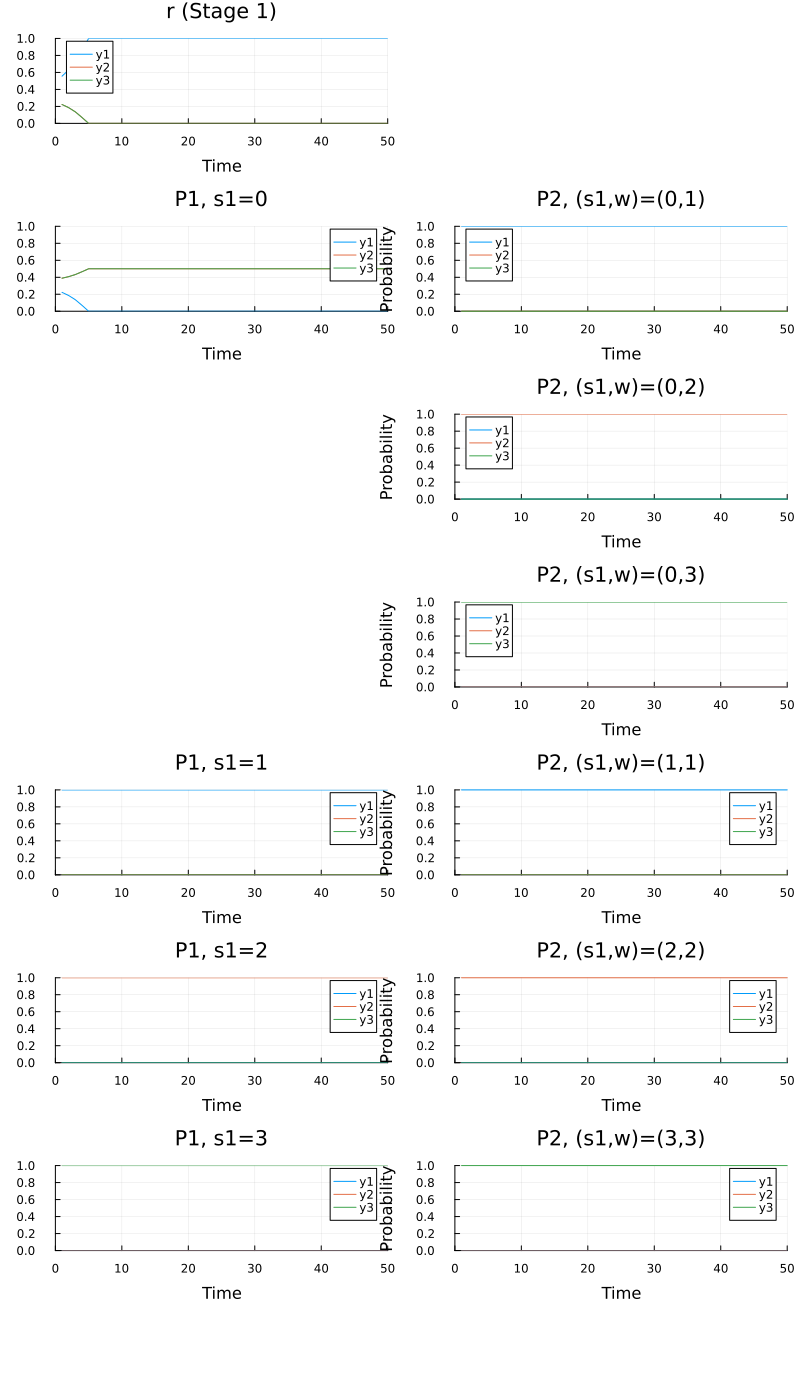

In [10]:
x_matrix = out["x_matrix"]
r_matrix = out["r_matrix"]
titles = ["r (Stage 1)","P1, s1=0","P1, s1=1","P1, s1=2","P1, s1=3",
    "P2, (s1,w)=(0,1)","P2, (s1,w)=(0,2)","P2, (s1,w)=(0,3)",
    "P2, (s1,w)=(1,1)","P2, (s1,w)=(2,2)","P2, (s1,w)=(3,3)"]
index_map = [1,2,6,7,8,3,9,4,10,5,11] ## reorder states/titles in graph
# Assuming `x_matrix` is your n x m matrix
n, m = size(x_matrix)
num_vectors = 10  # Number of 3-vectors
vector_length = 3  # Length of each vector
@assert n == num_vectors*vector_length "Provided dimensions do not match";

data = []
 
push!(data, hcat(1:m,transpose(r_matrix)))

for i in 1:num_vectors ## add Stage 2 decision variables
    # Extract each 3-vector and reshape it
    start_row = (i - 1) * vector_length + 1
    end_row = start_row + vector_length - 1
    vector_matrix = x_matrix[start_row:end_row, :]

    # Convert to DataFrame
    new_matrix = hcat(1:m,transpose(vector_matrix))
    
    push!(data, new_matrix)
end


### PLOTTING

using Plots
using DataFrames

# Assuming `data` is your reshaped data suitable for plotting
# Each element in `data` is a DataFrame with columns representing the components of a 3-vector and rows representing timesteps

plots = []



for i in 1:11  # Assuming 10 such 3-vectors
    j = index_map[i]
    mat = data[j]  # Your DataFrame for each 3-vector
    if i>1
        p = plot(mat[:,1],mat[:,2:4], xlabel="Time", ylabel="Probability", title=titles[j],ylimits=(0,1),xlimits=(0,50))
    else
        p = plot(mat[:,1],mat[:,2:4], xlabel="Time", ylabel="Scouts", title=titles[j],ylimits=(0,1),xlimits=(0,50))
    end
    push!(plots, p)
    if i==1
       push!(plots,plot(legend=false,grid=false,foreground_color_subplot=:white)) 
    end
    if i>2 && i<5
       push!(plots,plot(legend=false,grid=false,foreground_color_subplot=:white)) 
    end
end

# Combine all subplots into one figure
plot(plots..., layout=(8, 2), legend=true)  # Adjust layout as needed
plot!(size = (800, 1400))

## Plot Decisions/Costs over GD (under construction)

This section is still under construction. I wanted a visualization that included the costs, over time, as well. This would be useful for debugging.

In [ ]:
game,fs = build_stage_2(prior,omega_params)

In [92]:
# game,fs = build_stage_2(prior,omega_params)
r_mat = out["r_matrix"]
x_mat = out["x_matrix"]

cost_matrix = 1:10
cost_matrix = cost_matrix'
print(size(cost_matrix))

m = size(r_mat)[2]

for tt in 1:3
    current_costs = [ff(BlockArray(x_mat[:,tt], repeat([3], outer = 10)),r_mat[:,tt]) for ff in fs]
    cost_matrix = vcat(cost_matrix, current_costs')
    print(current_costs)
end
cost_matrix = cost_matrix[2:end,:]

(1, 10)[2.3930842546822988e-32, 3.000000000000001, 3.0, 3.0, 0.6666666666730381, 0.6666666700460344, 0.6666666666392559, 2.2281153200039965, 2.697318212713702, 2.9428082063440497][6.958731016193841e-32, 3.000000000000001, 3.0, 3.0, 0.6666666927151942, 0.6666666734970208, 0.6666670438042436, 2.2281153181224544, 2.697318211960431, 2.9428081736570926][2.2177776286658088e-31, 3.000000000000001, 3.0, 3.0, 0.6666666672499614, 0.666666667057768, 0.6666666666712378, 2.2281153199624795, 2.697318213276322, 2.942808206342194]

3×10 Matrix{Float64}:
 2.39308e-32  3.0  3.0  3.0  0.666667  …  0.666667  2.22812  2.69732  2.94281
 6.95873e-32  3.0  3.0  3.0  0.666667     0.666667  2.22812  2.69732  2.94281
 2.21778e-31  3.0  3.0  3.0  0.666667     0.666667  2.22812  2.69732  2.94281

3×10 Matrix{Float64}:
 2.39308e-32  3.0  3.0  3.0  0.666667  …  0.666667  2.22812  2.69732  2.94281
 6.95873e-32  3.0  3.0  3.0  0.666667     0.666667  2.22812  2.69732  2.94281
 2.21778e-31  3.0  3.0  3.0  0.666667     0.666667  2.22812  2.69732  2.94281

In [ ]:
matrix = out["x_matrix"]
titles = ["P1, s1=0","P1, s1=1","P1, s1=2","P1, s1=3",
    "P2, (s1,w)=(0,1)","P2, (s1,w)=(0,2)","P2, (s1,w)=(0,3)",
    "P2, (s1,w)=(1,1)","P2, (s1,w)=(2,2)","P2, (s1,w)=(3,3)"]

# Assuming `matrix` is your n x m matrix
n, m = size(matrix)
num_vectors = 10  # Number of 3-vectors
vector_length = 3  # Length of each vector
@assert n == num_vectors*vector_length "Provided dimensions do not match";

data_states = []
for i in 1:num_vectors
    # Extract each 3-vector and reshape it
    start_row = (i - 1) * vector_length + 1
    end_row = start_row + vector_length - 1
    vector_matrix = matrix[start_row:end_row, :]

    # Convert to DataFrame
    new_matrix = hcat(1:m,transpose(vector_matrix))
    
    push!(data_states, new_matrix)
end


### PLOTTING

using Plots
using DataFrames

# Assuming `data` is your reshaped data suitable for plotting
# Each element in `data` is a DataFrame with columns representing the components of a 3-vector and rows representing timesteps

plots = []
for i in 1:10  # Assuming 10 such 3-vectors
    mat = data[i]  # Your DataFrame for each 3-vector
    p = plot(mat[:,1],mat[:,2:4], xlabel="Time", ylabel="Probability", title=titles[i],ylimits=(0,1),xlimits=(0,50))
    push!(plots, p)
end

# Combine all subplots into one figure
plot(plots..., layout=(5, 2), legend=true)  # Adjust layout as needed
plot!(size = (800, 1000))

LoadError: KeyError: key "xmatrix" not found

In [38]:
fs

10-element Vector{Function}:
 #419 (generic function with 1 method)
 #422 (generic function with 1 method)
 #422 (generic function with 1 method)
 #422 (generic function with 1 method)
 #424 (generic function with 1 method)
 #424 (generic function with 1 method)
 #424 (generic function with 1 method)
 #426 (generic function with 1 method)
 #426 (generic function with 1 method)
 #426 (generic function with 1 method)

In [73]:
r_mat = out["r_matrix"]
x_mat = out["x_matrix"]

m = size(r_mat)[2]

for tt in 1:3
    current_costs = [ff(BlockArray(x_mat[:,tt], repeat([3], outer = 10)),r_mat[:,tt]) for ff in fs]
    print(current_costs)
end

[2.3930842546822988e-32, 3.000000000000001, 3.0, 3.0, 0.6666666666730381, 0.6666666700460344, 0.6666666666392559, 2.2281153200039965, 2.697318212713702, 2.9428082063440497][6.958731016193841e-32, 3.000000000000001, 3.0, 3.0, 0.6666666927151942, 0.6666666734970208, 0.6666670438042436, 2.2281153181224544, 2.697318211960431, 2.9428081736570926][2.2177776286658088e-31, 3.000000000000001, 3.0, 3.0, 0.6666666672499614, 0.666666667057768, 0.6666666666712378, 2.2281153199624795, 2.697318213276322, 2.942808206342194]

In [71]:
current_costs

LoadError: UndefVarError: `current_costs` not defined